In [1]:
from orchestrator import TimeLapseOrchestrator
import time
import base64
from IPython.display import Image, display

orchestrator = TimeLapseOrchestrator()

Available samples: 1
Available microscopes: 1
Cytomat service connected: ObjectProxy({'name': 'Incubator Control', 'id': 'ws-user-twisty-cafe-26457667/DSPmPtjZtcZZDXtdFgSgXU:incubator-control', 'config': ObjectProxy({'visibility': 'public', 'workspace': 'ws-user-twisty-cafe-26457667', 'url': 'http://127.0.0.1:9527/ws-user-twisty-cafe-26457667/services/ws-user-twisty-cafe-26457667/DSPmPtjZtcZZDXtdFgSgXU:incubator-control'}), 'initialize': <function RPC._generate_remote_method.<locals>.remote_method at 0x7ca58c23d300>, 'put_sample_from_transfer_station_to_slot': <function RPC._generate_remote_method.<locals>.remote_method at 0x7ca58c23d3a0>, 'get_sample_from_slot_to_transfer_station': <function RPC._generate_remote_method.<locals>.remote_method at 0x7ca58c23d440>, 'is_busy': <function RPC._generate_remote_method.<locals>.remote_method at 0x7ca58c23d4e0>, 'type': 'generic'})
Dorna service connected: ObjectProxy({'name': 'Robotic Arm Control', 'id': 'ws-user-furtive-charger-52893638/URyPGW

In [3]:
orchestrator.incubator.initialize()
while orchestrator.incubator.is_busy():
    time.sleep(1)

In [3]:
orchestrator.incubator.get_sample_from_slot_to_transfer_station(3)
while orchestrator.incubator.is_busy():
    time.sleep(1)

In [3]:
orchestrator.incubator.put_sample_from_transfer_station_to_slot(3)
while orchestrator.incubator.is_busy():
    time.sleep(1)

In [14]:
orchestrator.microscope.home_stage()

'The stage moved to home position in z, y, and x axis'

In [9]:
orchestrator.microscope.return_stage(context=None)

'The stage moved to the initial position'

## Every time you want to stop the robotic arm, you can run 'halt'

In [ ]:
orchestrator.robotic_arm.connect()
orchestrator.robotic_arm.halt()


True

In [2]:
orchestrator.complete_process_transport_sample_from_incubator_to_microscope()

Sample moved to transfer station.
microscope homed.
Sample grabbed from incubator.
Sample moved to microscope.
Sample placed on microscope.
Sample moved to microscope.
microscope returned.


Move the microscope's stage to well A1, and snap an image

In [13]:
orchestrator.microscope.navigate_to_well('A',1,wellplate_type="96")
image = orchestrator.microscope.snap(exposure_time=28,channel=0,intensity=20)

In [ ]:
image_base64 = orchestrator.microscope.one_new_frame(exposure_time=28,channel=0,intensity=20)
cv2.imshow('image', image_base64)


http://127.0.0.1:9527/ws-user-zenith-glue-70976543/apps/data-store-real-microscope_local/get?id=7213c68b-a737-4966-9021-f4270a3444d6


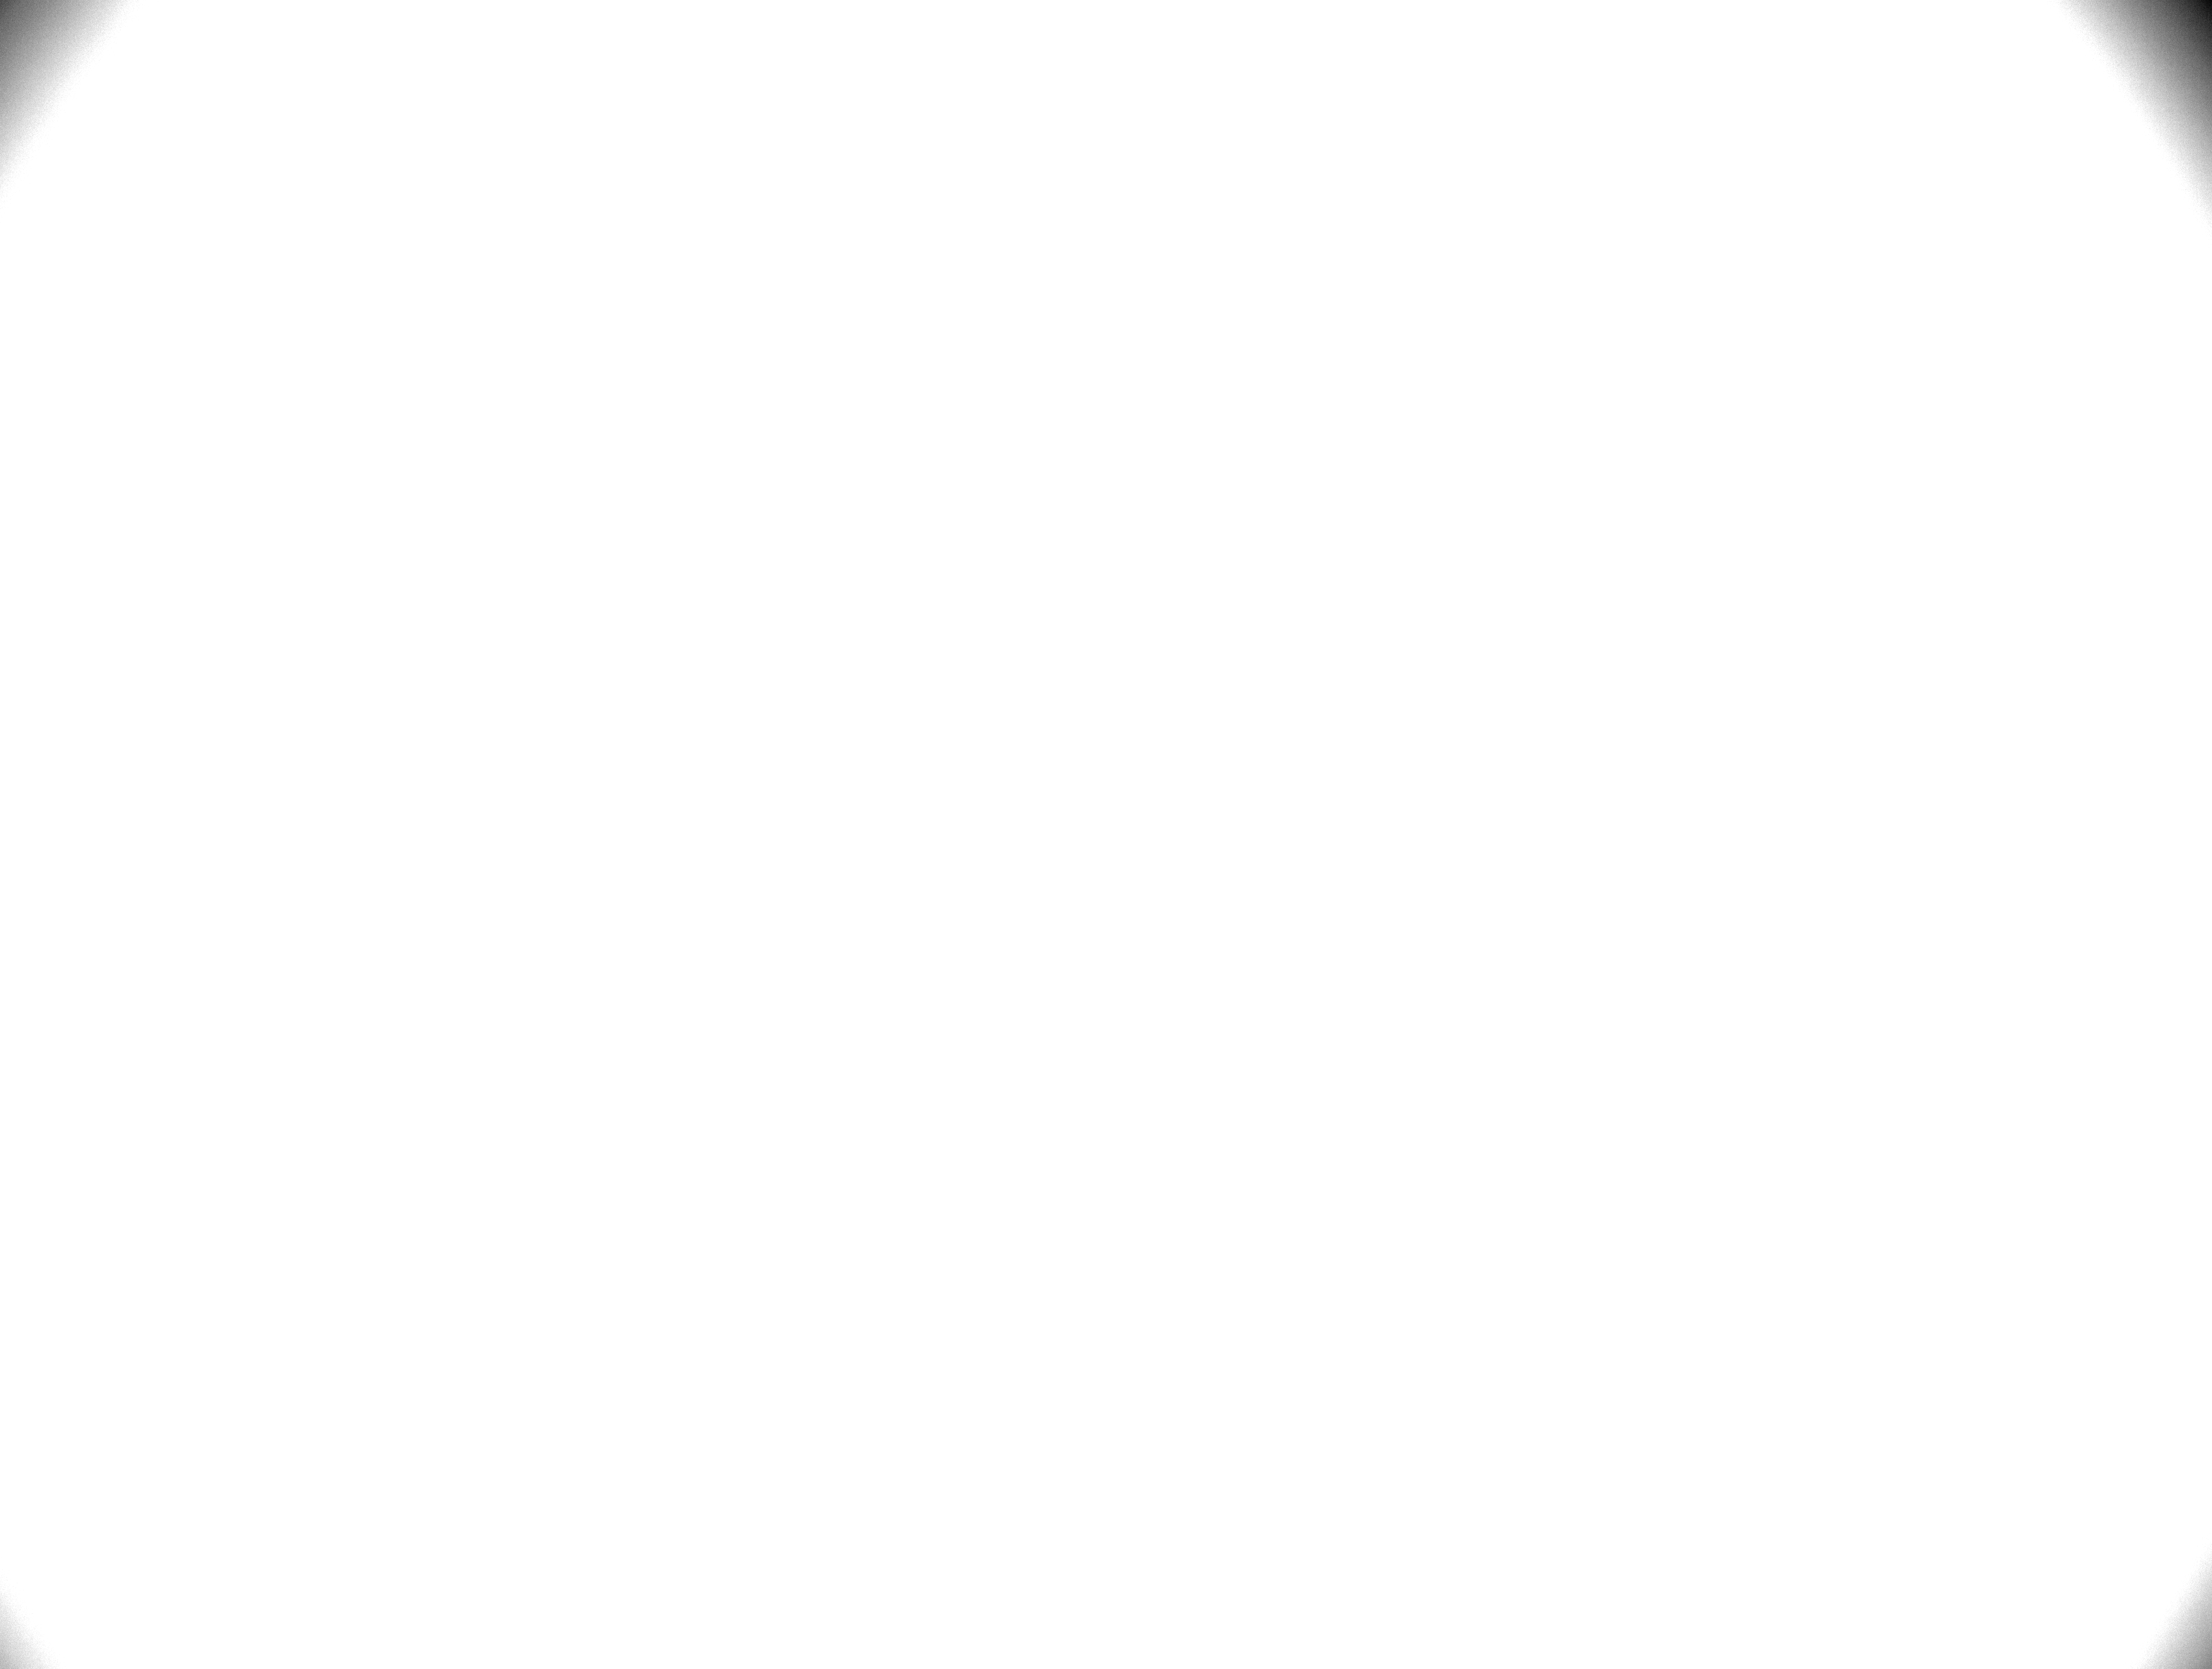

In [2]:
image_base64 = orchestrator.microscope.one_new_frame(exposure_time=28,channel=0,intensity=20)
img_data = base64.b64decode(image_base64)
display(Image(data=img_data))

In [2]:
orchestrator.complete_process_transport_sample_from_microscope_to_incubator()

microscope homed.
Sample grabbed from microscope.
Sample moved to incubator.
Sample placed on incubator.
Sample moved from microscope1 to incubator
Sample moved to incubator.
